In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cmocean

In [2]:
tau0 = 0.1
M = 4000e3
L = 10000e3
K = 1e3
beta = 1e-11
eps = K/(beta*L**3)
rho0 = 1e3
# eps = 1e-5
eps

1e-07

In [3]:
tau0*3/(rho0*beta*170e3*0.5e3)

0.35294117647058826

In [4]:
x = np.linspace(0,L,10000)
y = np.linspace(0,M,100)
x,y=np.meshgrid(x,y)

In [5]:
psi0i = (1/rho0)*(np.pi*tau0/beta)*np.sin(np.pi*y/M)*(-x/L+1-eps**(1/3))
psi0b = (1/rho0)*(np.pi*tau0/beta)*np.sin(np.pi*y/M)*(eps**(1/3)*np.exp(eps**(-1/3)*(x/L-1))+((eps**(1/3)-1)*np.cos(3**0.5/2*eps**(-1/3)*x/L)+((3-eps**(-1/3))/(3**0.5*eps**(-1/3)))*np.sin(3**0.5/2*eps**(-1/3)*x/L))*np.exp(-0.5*eps**(-1/3)*x/L))
psi0 = psi0i+psi0b

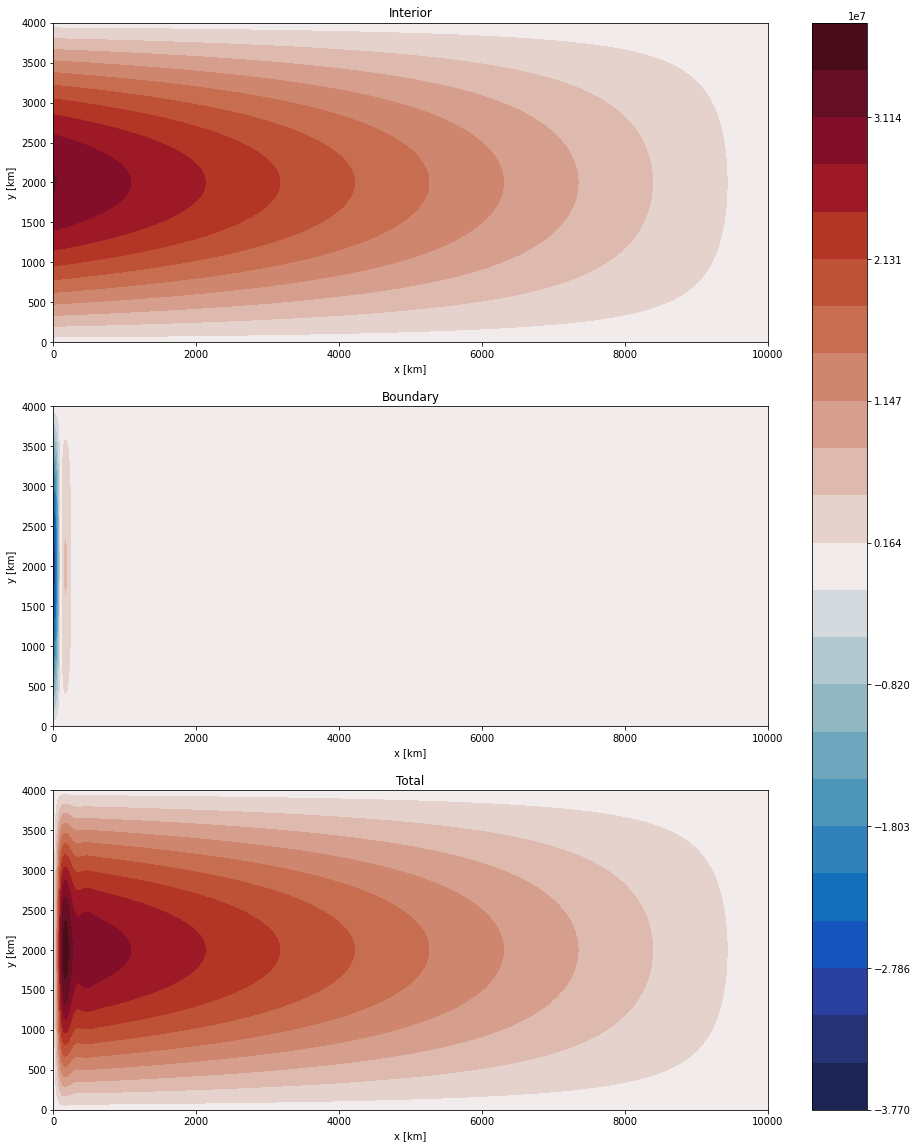

In [6]:
fig, axs = plt.subplots(3,1,figsize = (16,20))
lim = 1.2*np.pi*tau0/(beta*rho0)
axs[0].contourf(x/1e3,y/1e3,psi0i,levels =np.linspace(-lim,lim,24),vmin=-lim,vmax=lim,cmap=cmocean.cm.balance)
im = axs[1].contourf(x/1e3,y/1e3,psi0b,levels =np.linspace(-lim,lim,24),vmin=-lim,vmax=lim,cmap=cmocean.cm.balance)
axs[2].contourf(x/1e3,y/1e3,psi0,levels =np.linspace(-lim,lim,24),vmin=-lim,vmax=lim,cmap=cmocean.cm.balance)
axs[0].set_xlabel('x [km]')
axs[1].set_xlabel('x [km]')
axs[2].set_xlabel('x [km]')
axs[0].set_ylabel('y [km]')
axs[1].set_ylabel('y [km]')
axs[2].set_ylabel('y [km]')
axs[0].set_title('Interior')
axs[1].set_title('Boundary')
axs[2].set_title('Total')
fig.colorbar(im,ax = axs[:], location = 'right')
plt.savefig('hw3c.png')

In [7]:
np.min(psi0b/(tau0/beta))

-0.003126617068102002

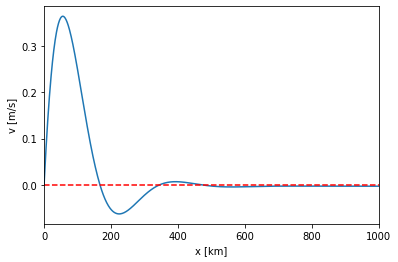

In [8]:
v = np.gradient(psi0[50,:],x[0,1]-x[0,0])/1000
v[0]=0
plt.plot(x[0,:]/1e3,v)
plt.xlabel('x [km]')
plt.ylabel('v [m/s]')
plt.xlim([0,1000])
# plt.ylim([-0.1,0])
plt.hlines(0,0,1000,color='red',linestyle = '--')
# plt.savefig('hw3d.png')

In [9]:
psi_segment = psi0[50,:]
print(x[0,np.argmax(psi_segment)]/1e3)

167.016701670167


In [10]:
eps**(-1/3)

215.4434690031883

In [34]:
a0 = eps**(-1/3)
scale = np.exp(a0/2)/(4*(3*np.exp(2*a0)*a0-np.exp(a0/2)*(3**0.5*a0+6*np.exp(a0)-4)*np.sin(3**0.5*a0/2)+np.exp(a0/2)*(2*3**0.5*np.exp(a0)-3*a0)*np.cos(3**0.5*a0/2)-2*3**0.5))
# a = scale*(-16*np.pi*np.sin(3**0.5*a0/2))
# # a = 0
# # d = -np.pi
# b = scale*2*(4*3**0.5*np.pi*np.exp(3*a0/2)-4*np.pi*np.sin(3**0.5*a0/2)-4*3**0.5*np.pi*np.cos(3**0.5*a0/2))
# c = scale*(-2)*(4*np.pi*np.exp(3*a0/2)+4*3**0.5*np.pi*np.sin(3**0.5*a0/2)-4*np.pi*np.cos(3**0.5*a0/2))
# d = scale*(12*np.pi*a0*np.exp(3*a0/2)-4*3**0.5*a0*np.sin(3**0.5*a0/2)+16*np.pi*np.sin(3**0.5*a0/2)-12*np.pi*a0*np.cos(3**0.5*a0/2))
a = 0
b = -np.pi
c = 4*np.pi/(3**0.5)
d = np.pi
psi_fs = (tau0/(rho0*beta))*np.sin(np.pi*y/M)*(-np.pi*x/L+d+a*np.exp(eps**(-1/3)*x/L)+(b*np.cos(3**0.5/2*eps**(-1/3)*x/L)+c*np.sin(3**0.5/2*eps**(-1/3)*x/L))*np.exp(-eps**(-1/3)*x/(2*L)))

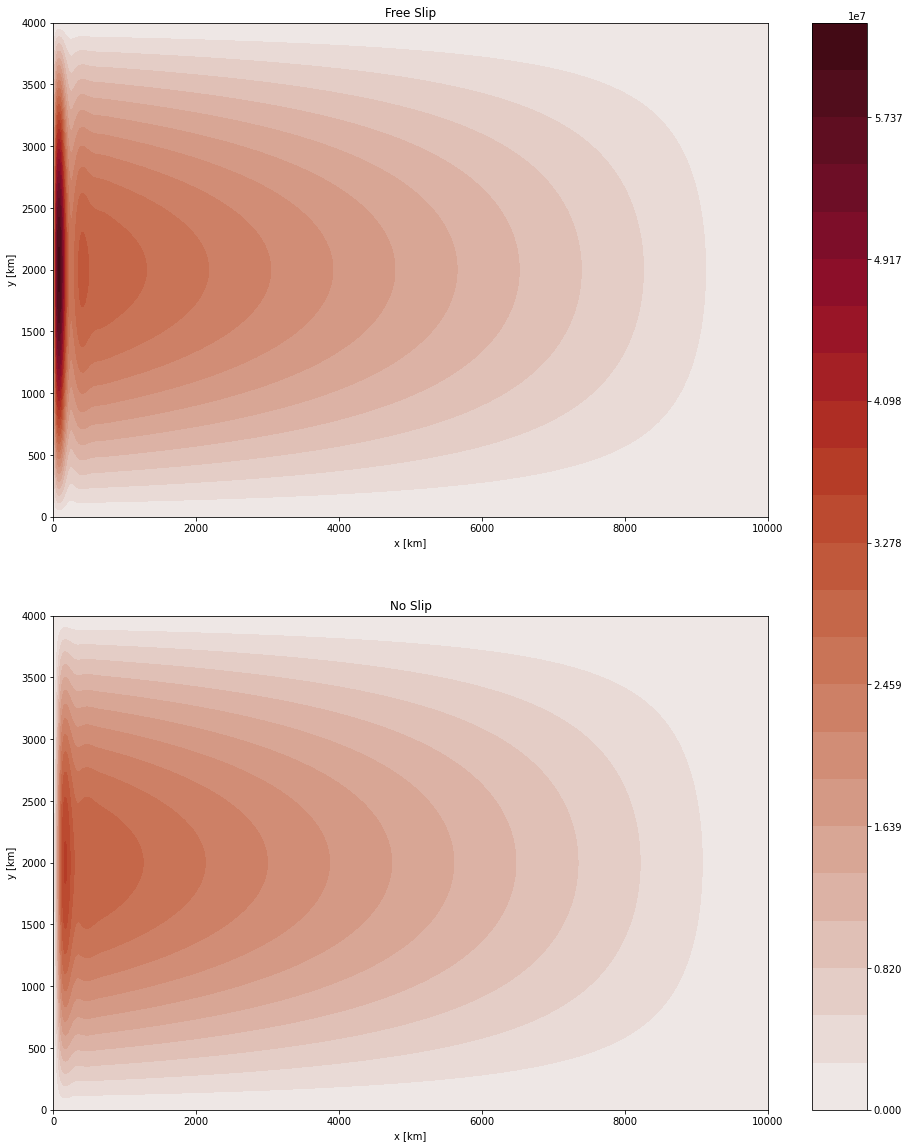

In [40]:
fig, axs = plt.subplots(2,1,figsize = (16,20))
lim = 2*np.pi*tau0/(beta*rho0)
axs[0].contourf(x/1e3,y/1e3,psi_fs,levels =np.linspace(0,lim,24),vmin=0,vmax=lim,cmap=cmocean.cm.amp)
im = axs[1].contourf(x/1e3,y/1e3,psi0,levels =np.linspace(0,lim,24),vmin=0,vmax=lim,cmap=cmocean.cm.amp)
# axs[2].contourf(x/1e3,y/1e3,psi0,levels =np.linspace(-lim,lim,24),vmin=-lim,vmax=lim,cmap=cmocean.cm.balance)
axs[0].set_xlabel('x [km]')
axs[1].set_xlabel('x [km]')
axs[0].set_ylabel('y [km]')
axs[1].set_ylabel('y [km]')
axs[0].set_title('Free Slip')
axs[1].set_title('No Slip')
# axs[0].set_xlim([0,1000/1e3])
# axs[1].set_xlim([0,1000/1e3])

# axs[2].set_title('Total')
fig.colorbar(im,ax = axs[:], location = 'right')
plt.savefig('hw3f.png')

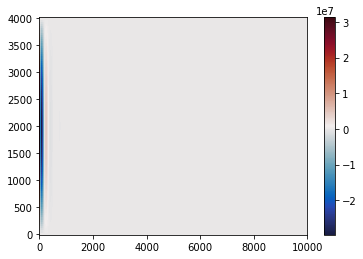

In [36]:
plt.pcolormesh(x/1e3,y/1e3,psi0i-psi_fs,cmap=cmocean.cm.balance)
plt.colorbar()

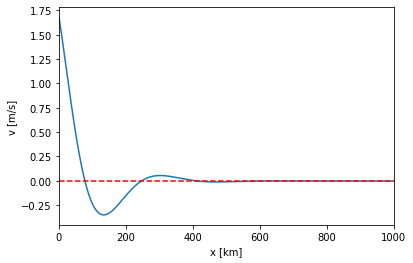

In [46]:
# u = np.gradient(psi_fs[:,0],y[1,0]-y[0,0])/1000
grad = np.gradient(psi_fs,y[1,0]-y[0,0],x[0,1]-x[0,0])
u = -grad[0]/1000
v = grad[1]/1000
# plt.pcolormesh(x/1e3,y/1e3,(u**2+v**2)**0.5)
# plt.colorbar()
# u[0]=0
# v = np.gradient(psi_fs[50,:],np.abs(x[0,1]-x[0,0]))/1000
# v[0]=0
plt.plot(x[50,:]/1e3,v[50,:])
plt.xlabel('x [km]')
plt.ylabel('v [m/s]')
plt.xlim([0,1000])
# plt.ylim([-0.1,0])
plt.hlines(0,0,1000,color='red',linestyle = '--')
plt.savefig('hw3fv.png')

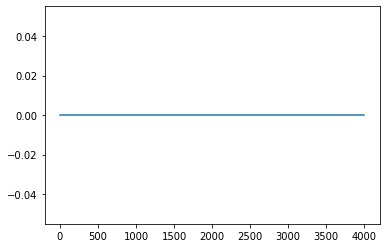

In [38]:
plt.plot(y[:,0]/1e3,u[:,0])

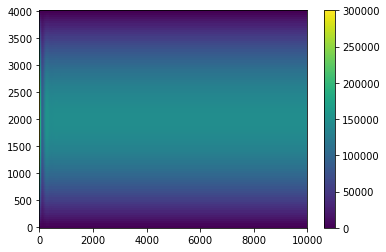

In [29]:
plt.pcolormesh(x/1e3,y/1e3,psi_fs-psi0i,vmin=0,vmax=3e5)
plt.colorbar()